In [1]:
import pandas as pd
import altair as alt
import numpy as np


In [12]:
kof_df = pd.read_csv('Datasets/KOF_clean.csv')
kof_df.head()

,code,country,year,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFEcGIdj,KOFTrGI,...,KOFIpGIdj,KOFInGI,KOFInGIdf,KOFInGIdj,KOFCuGI,KOFCuGIdf,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
0,BRA,Brazil,1990,42.0,44.0,40.0,28.0,24.0,31.0,26.0,...,32.0,39.0,32.0,46.0,40.0,29.0,51.0,65.0,85.0,46.0
1,BRA,Brazil,1991,44.0,43.0,44.0,27.0,23.0,31.0,27.0,...,32.0,39.0,31.0,46.0,38.0,30.0,46.0,71.0,84.0,58.0
2,BRA,Brazil,1992,45.0,45.0,45.0,29.0,27.0,32.0,28.0,...,33.0,40.0,31.0,50.0,38.0,29.0,47.0,72.0,84.0,60.0
3,BRA,Brazil,1993,46.0,46.0,46.0,30.0,29.0,32.0,29.0,...,32.0,41.0,30.0,52.0,40.0,32.0,47.0,73.0,84.0,62.0
4,BRA,Brazil,1994,48.0,45.0,50.0,29.0,25.0,33.0,29.0,...,33.0,41.0,30.0,52.0,39.0,34.0,44.0,81.0,86.0,75.0


In [13]:
dataset_list = ['BOVESPA-BRA-Clean', 'CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean']

sp_df = pd.read_csv('Datasets/S&P500-USA-Clean.csv')
countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for df_name in dataset_list:
    df = pd.read_csv('./Datasets/' + df_name + '.csv')
    countries_df = pd.concat([countries_df, df])

kof_df = kof_df.merge(countries_df, on=['year', 'code'])

In [14]:
alt.Chart(kof_df).mark_point().encode(
    x='KOFGI',
    y='YoY Change:Q',
    color='code:N'
).interactive()

alt.Chart(...)

<Axes: >

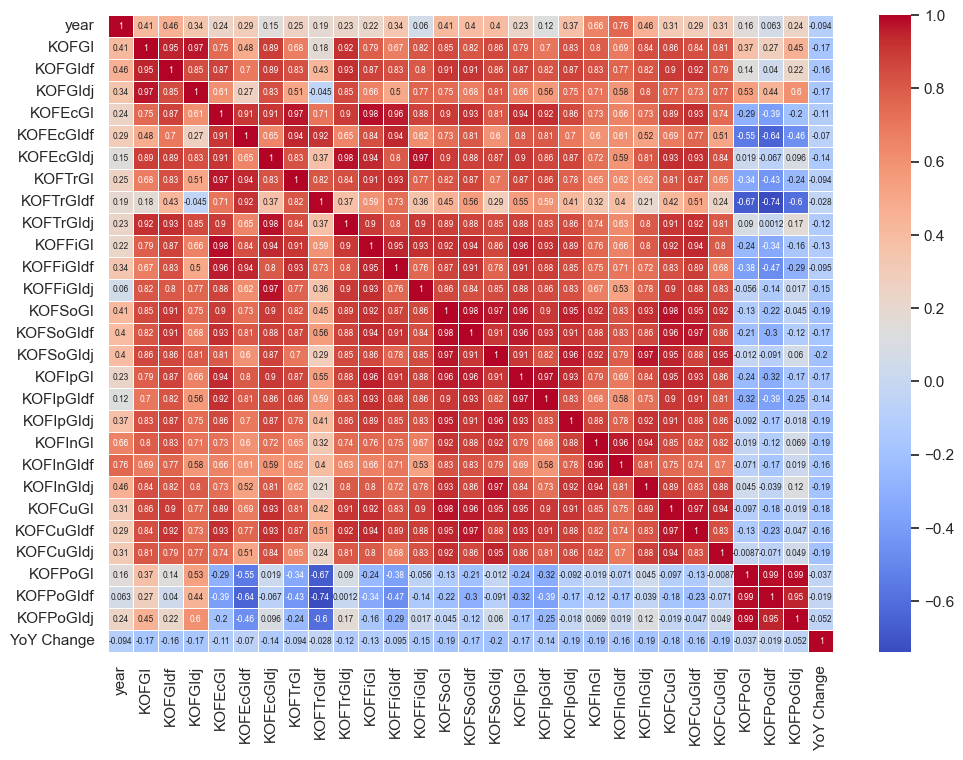

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df.drop(['country', 'code'], axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6})

In [16]:
kof_df.shape

(233, 31)

In [17]:
#Lets set up the new_dfframes 
new_df = kof_df

x= new_df['YoY Change'].iloc[0:]


volatility = x.rolling(10).std().dropna()

new_df['Volatility'] = volatility

new_df['Volatility'].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 56.34670732,
       55.52660791, 54.79169779, 54.41164819, 54.69239811, 41.08754269,
       40.45556903, 41.16292228, 39.33743742, 32.70664571, 33.22786213,
       33.25842716, 34.09140513, 33.2619702 , 29.79651266, 21.75374319,
       21.7404493 , 56.44098317, 56.67987328, 57.09817811, 57.67945011,
       57.24724531, 57.13055895, 58.22974387, 58.18404383, 58.65425721,
       60.20214076, 31.35066893, 31.26628063, 30.5462965 , 30.06342364,
       46.93350692, 52.78234955, 59.41442698, 61.8423502 , 61.98588985,
       62.13321961, 61.14839833, 61.68474226, 61.76725141, 61.40282284,
       48.50462105, 38.90070826, 31.26455508, 26.31372018, 25.93146172,
       23.74205176, 24.0750962 , 26.14365683, 22.00634809, 21.63308661,
       21.86523901, 24.40621719, 29.54336407, 27.46593519, 26.79599631,
       27.27111732, 27.17559307, 23.34159029, 27.05252189, 26.41

In [19]:
new_df['KOFFiGI']

0      30.0
1      33.0
2      34.0
3      39.0
4      46.0
       ... 
228    79.0
229    80.0
230    80.0
231    81.0
232    80.0
Name: KOFFiGI, Length: 233, dtype: float64

<Axes: >

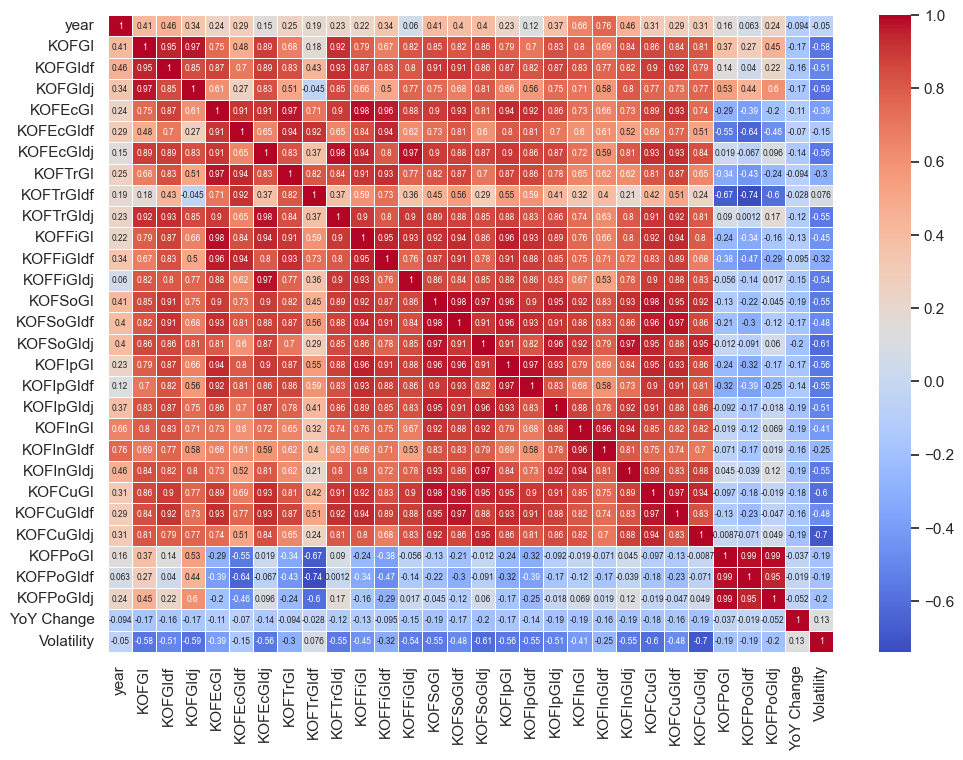

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = new_df.drop(['country', 'code'], axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6})

In [23]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame and it's already been loaded

# Create the lagged Volatility variable
new_df['Volatility_lagged'] = new_df.groupby('code')['Volatility'].shift(1)

# Drop the rows with missing values after shifting
new_df = new_df.dropna(subset=['Volatility_lagged'])
# Define the independent variables and add a constant term
X = new_df[['Volatility_lagged', 'KOFFiGI']]
X = sm.add_constant(X)

# Define the dependent variable
y = new_df['Volatility']

# Fit the regression model
model = sm.OLS(y, X).fit()
# Get the summary of the regression model
model_summary = model.summary()

# Print the regression model summary
print(model_summary)

# Perform hypothesis testing
# Test if the coefficients of Volatility_lagged and KOFFiGI are jointly significantly different from zero
hypotheses = '(Volatility_lagged = 0), (KOFFiGI = 0)'
f_test_result = model.f_test(hypotheses)

# Print the F-test result
print(f'Test for Hypotheses: {hypotheses}')
print(f'F-test result: {f_test_result}')


                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     974.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.93e-105
Time:                        21:50:46   Log-Likelihood:                -582.51
No. Observations:                 208   AIC:                             1171.
Df Residuals:                     205   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1490      1.51

/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_52031/1435161635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Volatility_lagged'] = new_df.groupby('code')['Volatility'].shift(1)
